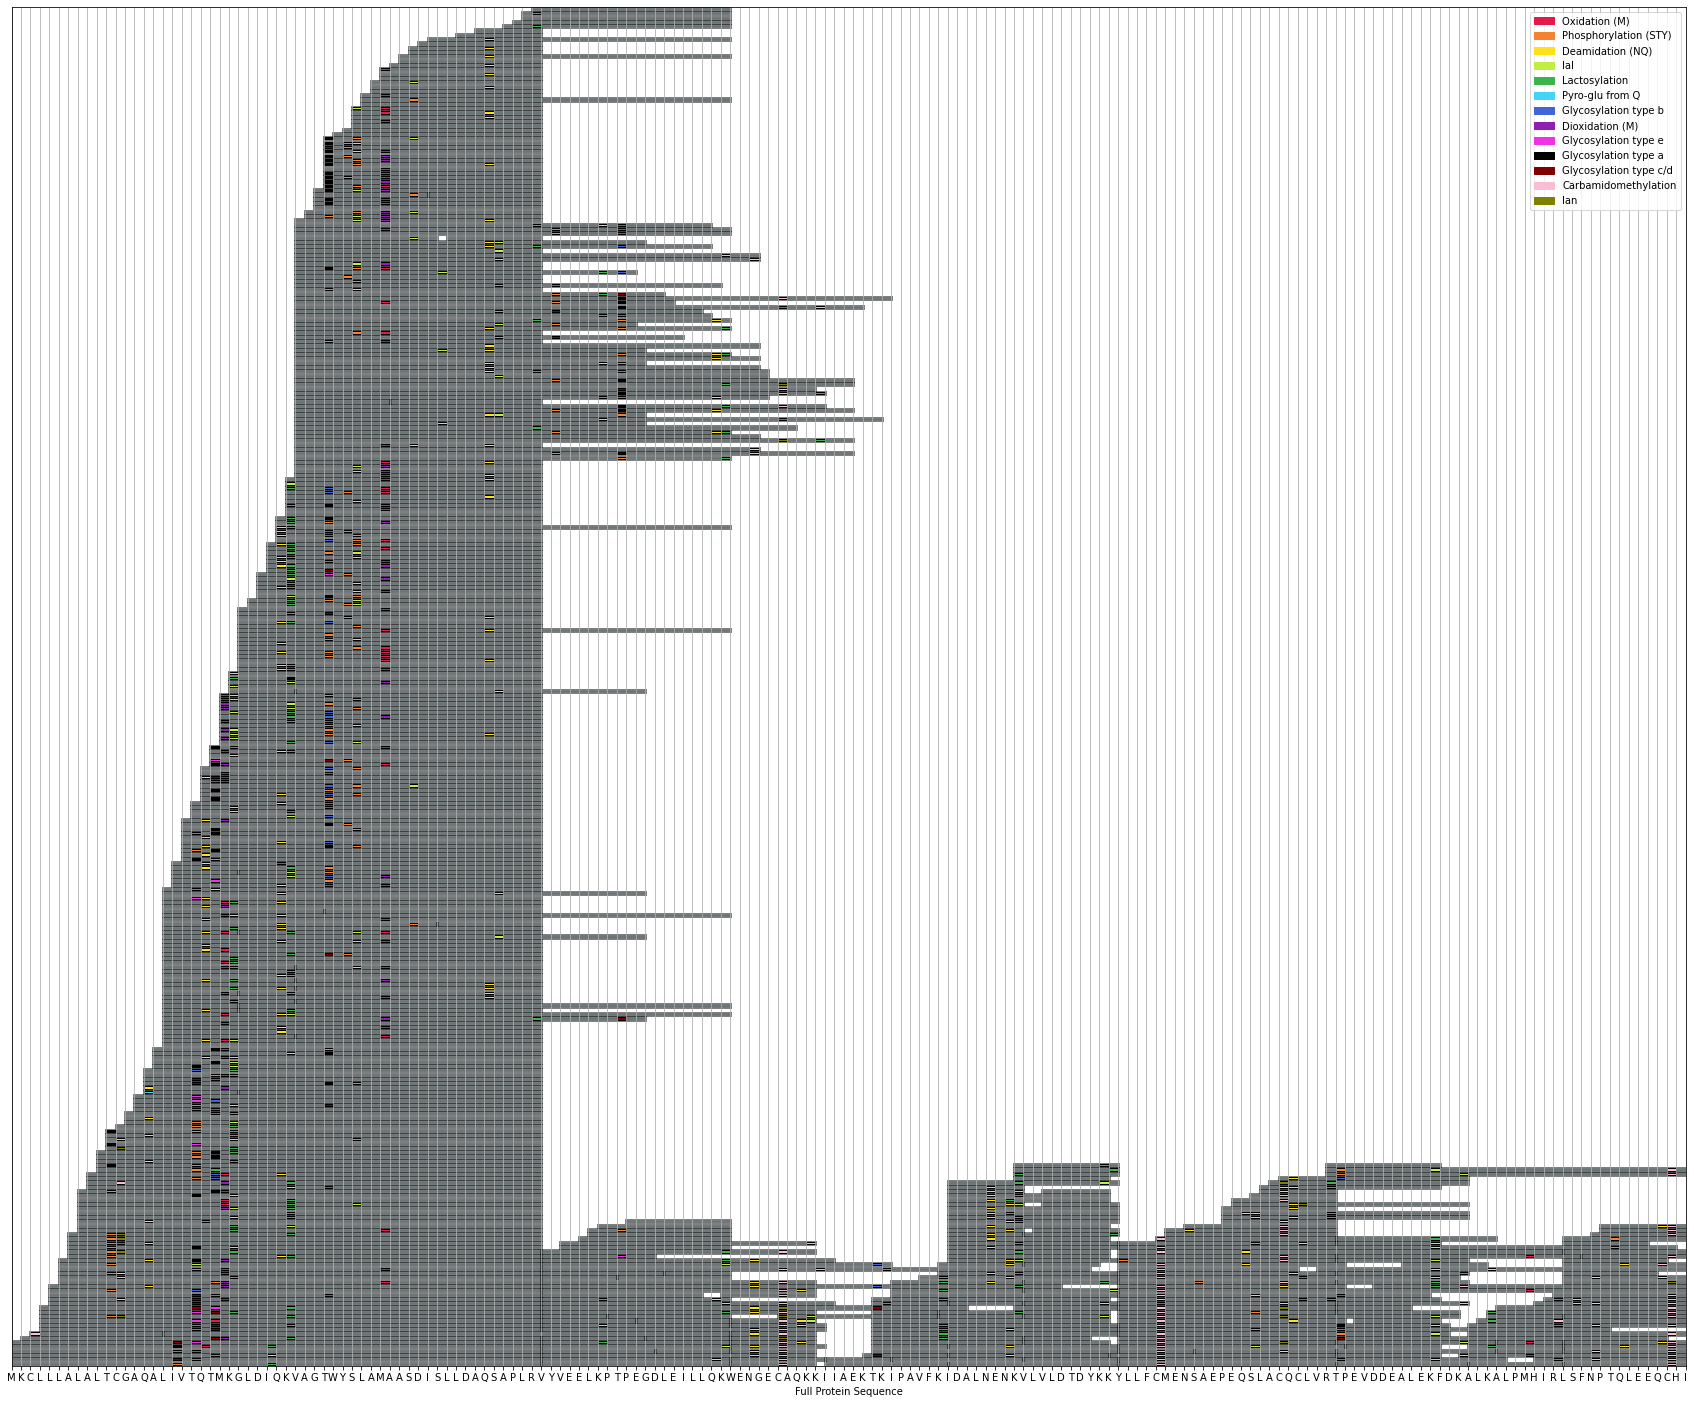

<AxesSubplot:xlabel='Full Protein Sequence'>

In [16]:
from utils import get_data_and_remove_unwanted_columns, sanitize_data, preprocess_data_for_peptide_segment_plot, get_peptide_segments_and_modifications, plot_peptide_segments, normalize_intensities_by_protein_intensity, split_data_in_samples, get_protein_sequence, get_overlap_overlaps_by_intensity_and_sample, get_overlap_pixel_plot, get_gradient_plot
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

_protein = "P02754"
df = get_data_and_remove_unwanted_columns()
df = sanitize_data(df)
dfs = normalize_intensities_by_protein_intensity(df)

# data = preprocess_data_for_peptide_segment_plot(df, _protein = _protein, size=1000)
data = preprocess_data_for_peptide_segment_plot(df, _protein = _protein, size=df.shape[0])
rectatngles, modifications, height = get_peptide_segments_and_modifications(data, 0.5, _protein)
plot_peptide_segments(rectatngles, modifications, height, _protein)

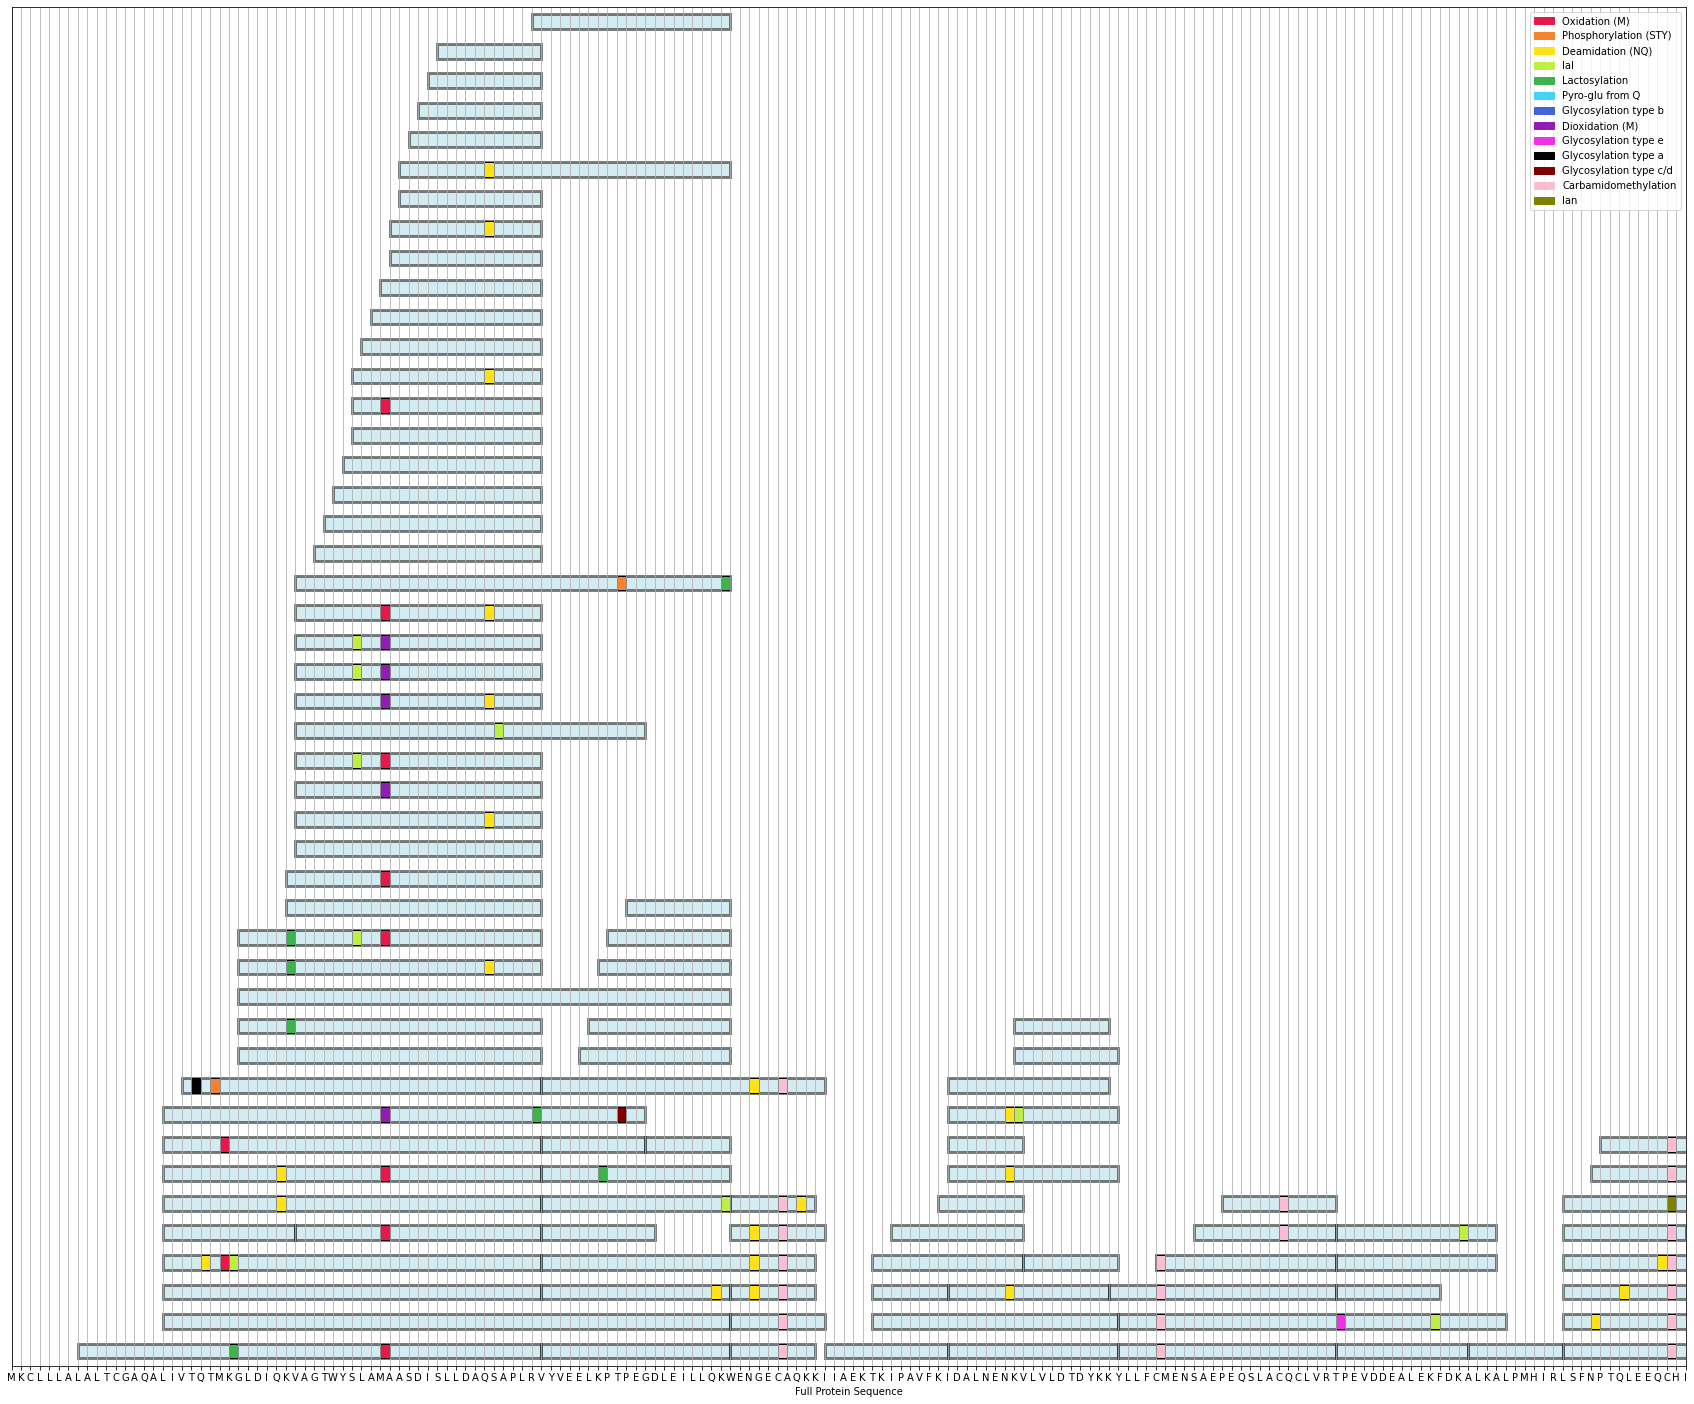

<AxesSubplot:xlabel='Full Protein Sequence'>

In [17]:
from utils import get_data_and_remove_unwanted_columns, sanitize_data, preprocess_data_for_peptide_segment_plot, get_peptide_segments_and_modifications, plot_peptide_segments, normalize_intensities_by_protein_intensity, split_data_in_samples, get_protein_sequence, get_overlap_overlaps_by_intensity_and_sample, get_overlap_pixel_plot, get_gradient_plot
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

_protein = "P02754"
df = get_data_and_remove_unwanted_columns()
df = sanitize_data(df)
dfs = normalize_intensities_by_protein_intensity(df)

data = preprocess_data_for_peptide_segment_plot(df, _protein = _protein, size=100)
rectatngles, modifications, height = get_peptide_segments_and_modifications(data, 0.5, _protein)
plot_peptide_segments(rectatngles, modifications, height, _protein)

<AxesSubplot:title={'center':'Number of overlaps per position - for protein: P02666'}, xlabel='Position', ylabel='Overlaps'>

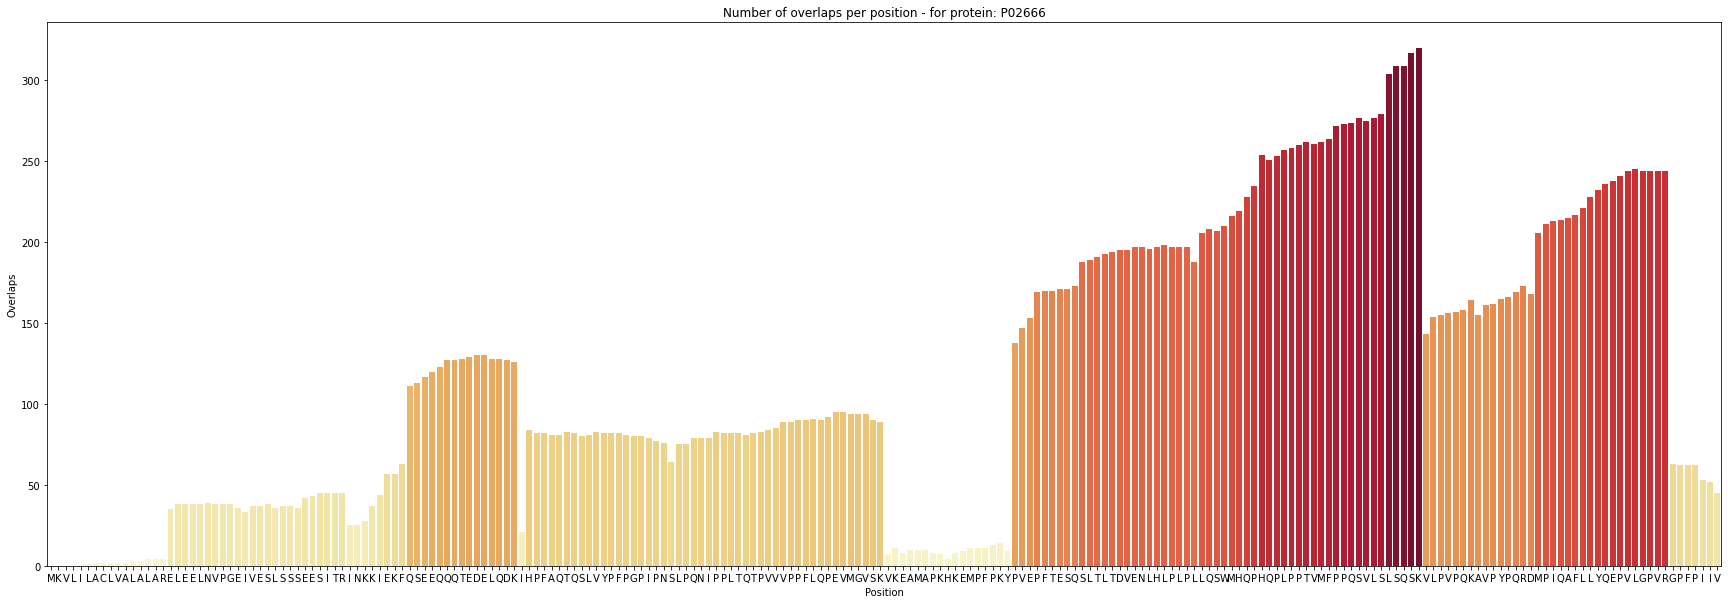

In [18]:
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

def plot_overlap_barchart2(df, selected_protein= "P02666"):
    df_new = df[df["Protein Accession"] == selected_protein]
    seq_list = list(get_protein_sequence(selected_protein))
    _len = len(seq_list)
    num_overlpas_list = [0]*_len # init as zeroes
    # add 1 into all positions where there is an overlap
    for i in range(len(df_new)):
        for j in range(df_new.iloc[i]['Start'], df_new.iloc[i]['End']):
            num_overlpas_list[j] += 1
    df_overlaps = pd.DataFrame(list(zip(range(_len), num_overlpas_list)), columns=['Position', 'Overlaps'])
    plt.figure(figsize=(30,10))
    g= sns.barplot(x="Position", y= "Overlaps", data= df_overlaps, palette=colors_from_values(np.asarray(num_overlpas_list), "YlOrRd"))
    g.set_xticklabels(seq_list)
    g.set_title(f"Number of overlaps per position - for protein: {selected_protein}")
    
    return g  

plot_overlap_barchart2(df)

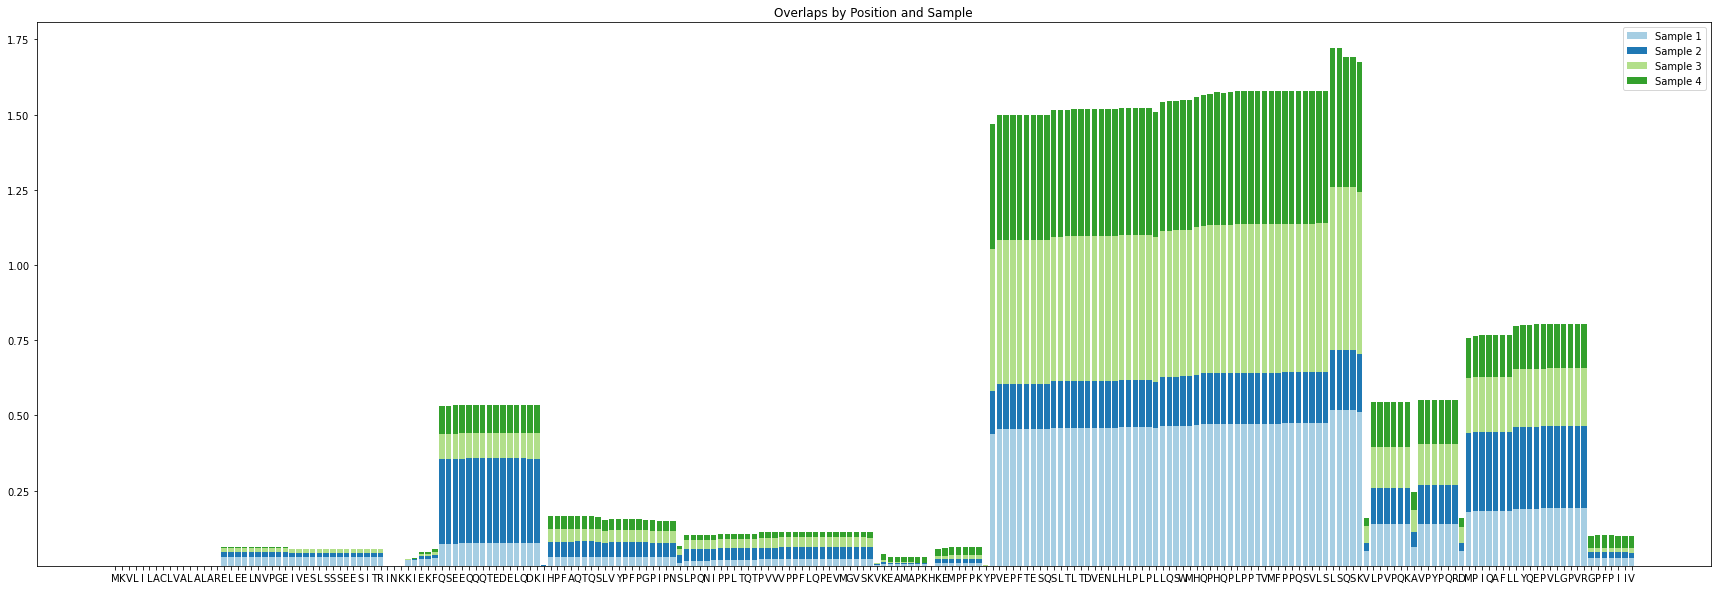

In [19]:
first = dfs[0]
lists, dataframes = get_overlap_overlaps_by_intensity_and_sample(first, "P02666")

seq_list = list(get_protein_sequence("P02666"))
fig, ax = plt.subplots(figsize = (30, 10))
ax.set_xticks(range(len(lists[0])))
ax.set_xticklabels(seq_list)

ax.bar(dataframes[0]['Position'], dataframes[0]['Overlaps'], label='Sample 1', color = '#A6CEE3')
ax.bar(dataframes[1]['Position'], dataframes[1]['Overlaps'], bottom=dataframes[0]['Overlaps'], label='Sample 2', color='#1F78B4')
ax.bar(dataframes[2]['Position'], dataframes[2]['Overlaps'], bottom=dataframes[1]['Overlaps'] + dataframes[0]['Overlaps'], label="Sample 3", color='#B2DF8A')
ax.bar(dataframes[3]['Position'], dataframes[3]['Overlaps'], bottom=dataframes[2]['Overlaps'] + dataframes[1]['Overlaps'] + dataframes[0]['Overlaps'], label="Sample 4", color='#33A02C')

ax.set_title('Overlaps by Position and Sample')
ax.legend()

224
4
224


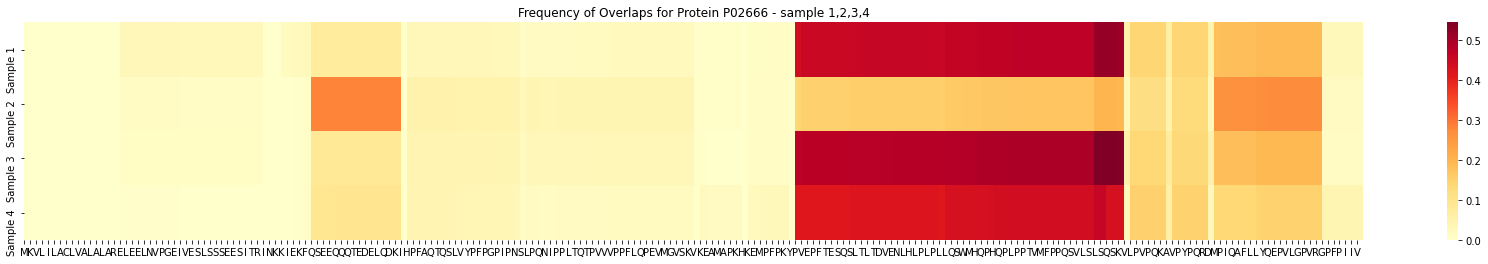

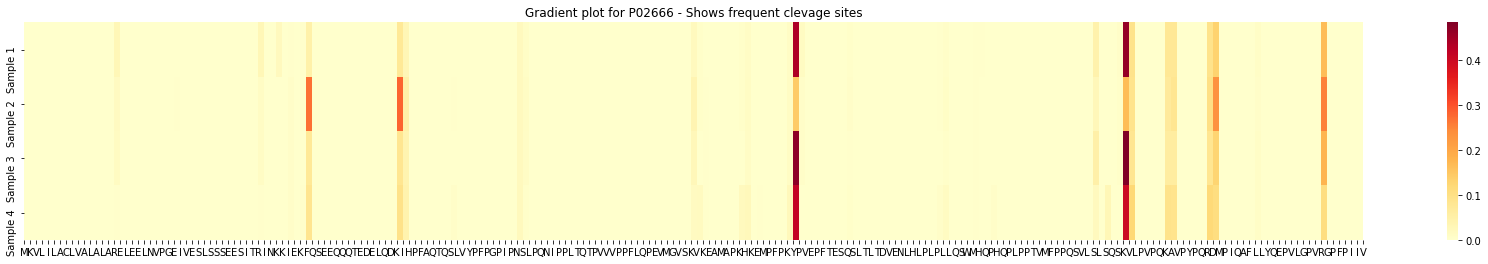

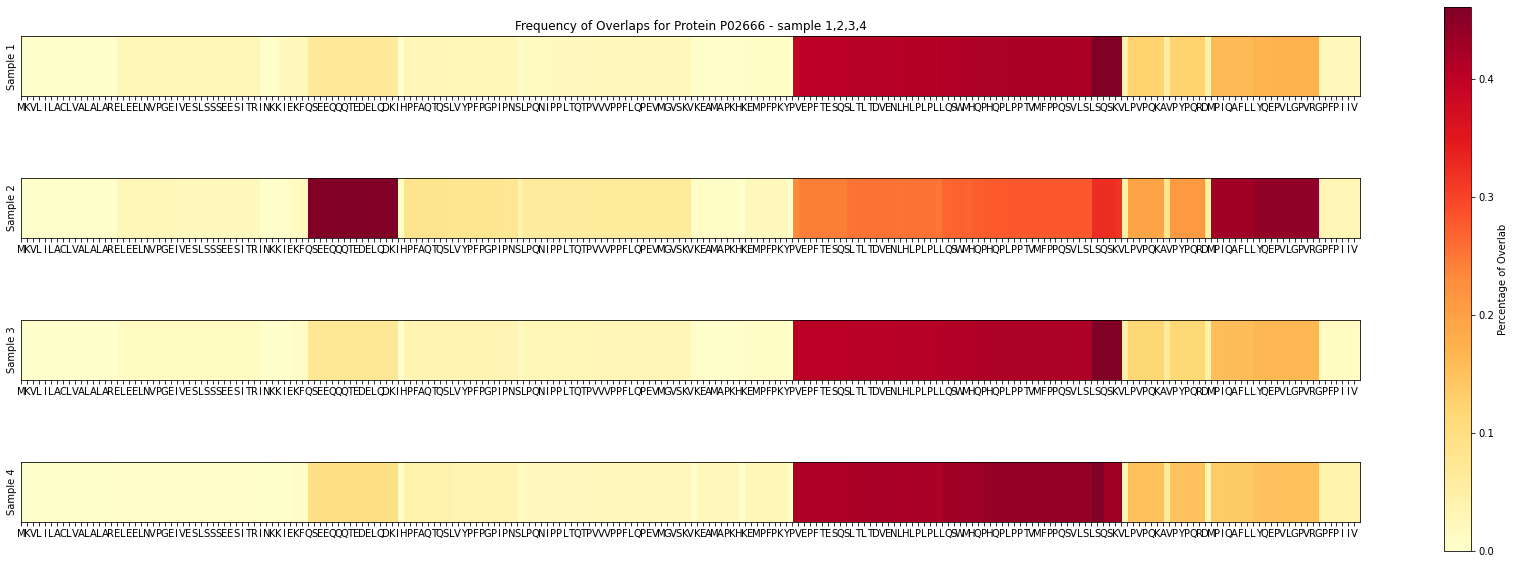

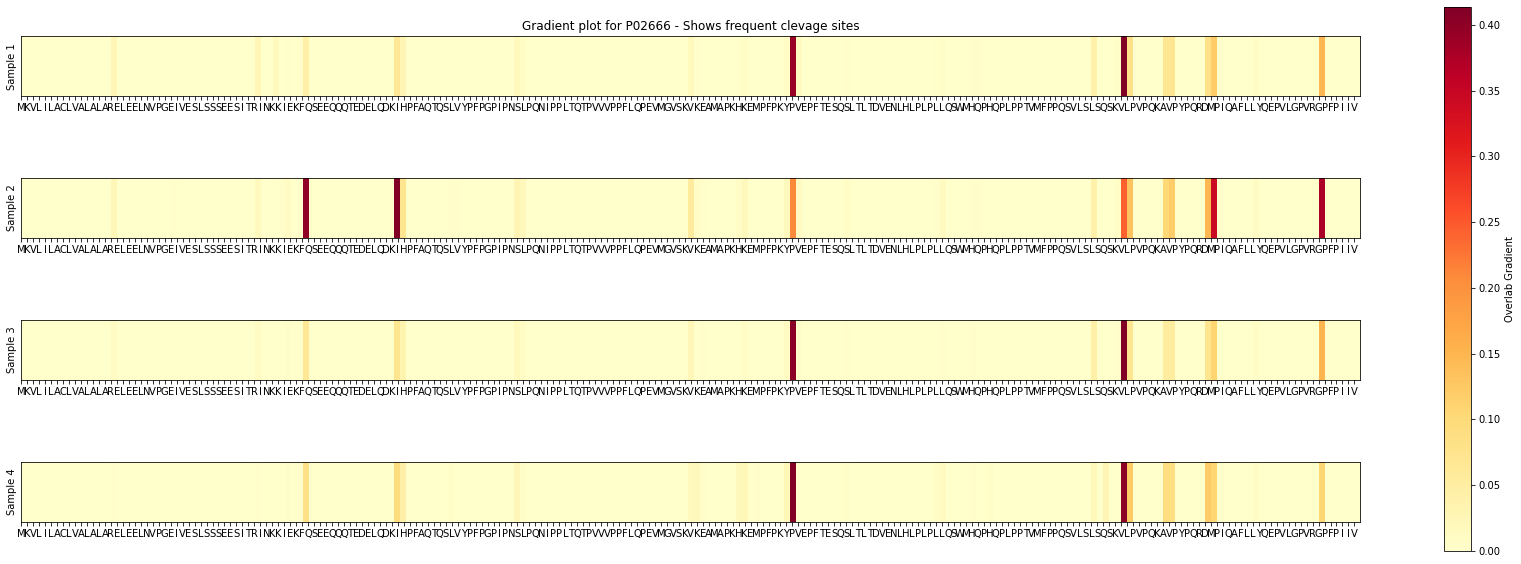

In [20]:
from utils import get_overlap_heapmap, get_overlap_gradient_heapmap
print(len(lists[0]))
print(len(lists))
# create list that saverage at each pos in lists
averages = [0]*len(lists[0])
for i in range(len(lists)):
    for j in range(len(lists[i])):
        averages[j] += lists[i][j]
print(len(averages))

get_overlap_heapmap(lists, seq_list, "P02666", fig_size=(30,4))
get_overlap_gradient_heapmap(lists, seq_list, "P02666", fig_size=(30,4))

get_overlap_pixel_plot(lists, seq_list, "P02666")

get_gradient_plot(lists, seq_list, "P02666")

In [21]:
_protein = "P02754"
df = get_data_and_remove_unwanted_columns()
df = sanitize_data(df)
dfs = normalize_intensities_by_protein_intensity(df)
data = preprocess_data_for_peptide_segment_plot(df, _protein = _protein, size=100)

# form : (start,end,pos_ms,mod_types,agg_intensity)
# get pos_ms and mod_types arrays
pos_andtypes = [(d[2],d[3]) for d in data]

df_ll = pd.DataFrame(pos_andtypes, columns=['Position', 'Modification'])
print(df_ll.head())
# create list of list for each position that is the same
#df_ll = df_ll.groupby(['Position']).apply(lambda x: x.tolist())



#count number of masshift for each type at each position
seq_list = list(get_protein_sequence(_protein))
res = []
for i in range(len(seq_list)):
    res.append({})
    
for i in range(len(pos_andtypes)):
    for j in range(len(pos_andtypes[i][0])):
        try:
            _counter = res[i]
            pos = pos_andtypes[i][0][j]
            mod_type = pos_andtypes[i][1][j]
            if pos in _counter:
                _counter[pos][mod_type] += 1
            else:
                _counter[pos] = {mod_type: 1}
        except:
            print(i)
#make staked bar chart from list of dicts
print(res)

for i in range(len(res)):
    if res[i] != {}:
        for key, value in res[i].items():
            res[i][key] = sum(valu.values())


      Position            Modification
0          [9]         [Oxidation (M)]
1           []                     NaN
2           []                     NaN
3           []                     NaN
4  [4, 17, 19]  [Carbamidomethylation]
4
4
34
34
46
46
53
70
76
87
99
[{9: {'Oxidation (M)': 1}}, {}, {}, {}, {4: {'Carbamidomethylation': 1}}, {}, {}, {}, {5: {'Lactosylation': 1}}, {}, {4: {'Deamidation (NQ)': 1}, 6: {'Oxidation (M)': 1}, 7: {'lal': 1}}, {20: {'Deamidation (NQ)': 1}}, {18: {'Deamidation (NQ)': 1}}, {}, {}, {}, {}, {}, {3: {'Oxidation (M)': 1}}, {11: {'Carbamidomethylation': 1}}, {}, {3: {'Deamidation (NQ)': 1}, 11: {'Carbamidomethylation': 1}}, {}, {6: {'Deamidation (NQ)': 1}}, {}, {}, {9: {'Dioxidation (M)': 1}}, {}, {22: {'Deamidation (NQ)': 1}, 25: {'Carbamidomethylation': 1}}, {}, {6: {'Deamidation (NQ)': 1}, 11: {'Carbamidomethylation': 1}}, {8: {'Carbamidomethylation': 1}}, {}, {}, {5: {'Carbamidomethylation': 1}}, {7: {'Carbamidomethylation': 1}}, {10: {'Deamidation (N

NameError: name 'valu' is not defined

In [ ]:
from utils import get_color_palette_for_modifications

fields = []
colors = []
pallette_map =get_color_palette_for_modifications ()
for key, value in pallette_map.items():
    fields.append(key)
    colors.append(value)
    
# figure and axis
fig, ax = plt.subplots(1, figsize=(12, 10))
# plot bars


In [22]:
# find distribution among intensities of dataframe
# get list of all intensities

# get indicies of dattaframe df
indicies = df.index.tolist()
for i in range(len(seq_list)):
    if i not in indicies:
        df.loc[i] = [0]*len(df.columns)

#make histrogram from intensities
#df_intensities = df.iloc[:,3:]



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,